<a href="https://colab.research.google.com/github/YisusKraizz/Unidad3/blob/main/Unidad3/Practica4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practica 4-2: Simular el número de llegadas de clientes a un cajero automático durante una hora

##Contexto del problema:

Imaginemos que modelamos la cantidad de clientes que llegan a un cajero automático en una hora. Observaciones previas indican un promedio de 5 clientes por hora. Queremos generar variables aleatorias representando estas llegadas usando la distribución de Poisson y el método de la transformada inversa.

##Distribución Poisson:

La distribución de Poisson modela eventos (llegadas de clientes) que ocurren en un tiempo fijo, con una tasa constante e independiente. La tasa (
𝜆
) es 5 clientes por hora.

##Método de la Transformada Inversa:

Este método genera números aleatorios que siguen una distribución específica (Poisson) a partir de números uniformes
𝑈
∼
(
0
,
1
)
.

##Pasos para aplicar la transformada inversa con Poisson:

Generar un número aleatorio uniforme
𝑈
.

Calcular la función de distribución acumulada (FDA) de Poisson sumando las probabilidades acumuladas.

###Programa en Python que aplica el método de la transformada inversa para generar variables aleatorias que modelan el número de clientes que llegan al cajero automático en una hora, utilizando la distribución Poisson.

Número de clientes que llegaron en cada simulación (hora):
[7, 8, 7, 3, 3, 3, 2, 6, 6, 10, 5, 3, 6, 4, 2, 3, 1, 4, 1, 2, 2, 10, 7, 4, 8, 7, 4, 3, 4, 8, 3, 7, 5, 2, 7, 1, 5, 3, 4, 5, 7, 4, 5, 4, 6, 6, 4, 3, 3, 8, 7, 6, 1, 6, 2, 3, 5, 8, 4, 3, 4, 4, 2, 2, 6, 4, 1, 3, 4, 7, 4, 4, 7, 4, 5, 7, 1, 6, 5, 4, 8, 3, 2, 6, 5, 3, 3, 5, 9, 2, 3, 6, 7, 6, 8, 6, 6, 3, 2, 5]


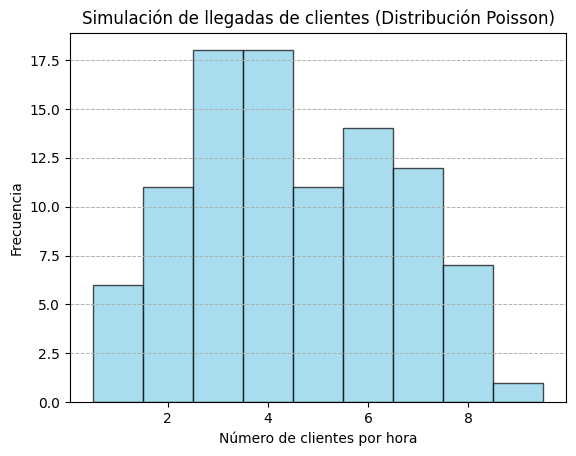

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parámetro de la distribución Poisson
lambda_poisson = 5  # Tasa promedio de llegadas por hora

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 100  # Número de simulaciones (horas)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de probabilidad de la distribución Poisson
def poisson_pmf(lambda_poisson, k):
    return (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)

# Función para generar números aleatorios usando la transformada inversa para la Poisson
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += poisson_pmf(lambda_poisson, k)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de llegadas
        k += 1

# Generar la cantidad de clientes que llegan en cada simulación (hora)
llegadas_simuladas = [poisson_inverse_transform(lambda_poisson, u) for u in U]

# Mostrar resultados
print("Número de clientes que llegaron en cada simulación (hora):")
print(llegadas_simuladas)

# Graficar los resultados
plt.hist(llegadas_simuladas, bins=np.arange(min(llegadas_simuladas), max(llegadas_simuladas) + 1) - 0.5, edgecolor='black', color='skyblue', alpha=0.7)
plt.title("Simulación de llegadas de clientes (Distribución Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()


#Conclusión

Este enfoque nos ayuda a predecir la cantidad de clientes que llegan al cajero automático, facilitando una mejor gestión del servicio. Además, proporciona una base para realizar ajustes en la planificación según las necesidades observadas, optimizando recursos y mejorando la experiencia del cliente. La combinación de estas técnicas es una herramienta poderosa para cualquier aplicación donde se deban gestionar eventos discretos y frecuentes con eficiencia y precisión.
